Analyse véhicules DE 

In [25]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('PSA_DE_20170412_2.csv',sep=';')
print(df.head())

   vo_annonce_id  cote_vo  cote_mcclbp                VIN  \
0              2     9586        10132  vf3pahmtcfr284240   
1              3    15950        16238  vf3lbbhzhfs244877   
2              4        0            0  vf73a5gztgj620217   
3              5        0        22651  vf3yatmfa12a81386   
4              6    15691        15040  vf77jbhymfj851921   

                          MCCLBP  PRIX_NEUF_BAR  PRIX_BAR   KMM  \
0   DE-82-3463-1-2-1-1.20-82---N        12610.0    5087.0  1000   
1   DE-82-580-2-2-1-1.60-120---N        25810.0    8589.0  3330   
2  DE-59-505-1-13-2-1.60-165---N        34035.0   10006.0  1250   
3  DE-82-241-2-14-1-2.20-130---N        36208.0   11692.0  1000   
4    DE-59-40-2-13-2-1.60-99---N        25190.0    6920.0  3330   

   PRIX_NEUF_AUTOBIZ  Ref ID  \
0            10264.0   84622   
1            21249.0   62679   
2            23643.0   84552   
3                NaN  136528   
4            15839.0  111499   

                         ...         

In [3]:
#df= df['b2b_prev'].replace(0,np.nan)
df=df[df['b2b_prev']>0]
df=df[df['PRIX_BAR']>0]
#print(list(df))
#print(df.head())
#df = df.dropna(axis=0,subset=['b2b_prev'])
#df = df[df['b2b_prev'].notnull()]

mean_auto = df['b2b_prev'].mean(axis=0)

mean_bar  = df['PRIX_BAR'].mean(axis=0)
print(len(df), 'cars')
#print(mean_auto, std_auto, mean_bar, std_bar)

5100 cars


In [4]:
df['b2b_prev_norm']=df['b2b_prev']/mean_auto
df['PRIX_BAR_norm']=df['PRIX_BAR']/mean_bar
std_auto  = df['b2b_prev_norm'].std(axis=0)
std_bar   = df['PRIX_BAR_norm'].std(axis=0)
print(std_auto, std_bar)

0.314572555322 0.300768028877


In [5]:
df[['b2b_prev','PRIX_BAR','b2b_prev_norm','PRIX_BAR_norm']].describe()


,b2b_prev,PRIX_BAR,b2b_prev_norm,PRIX_BAR_norm
count,5100.000000,5100.000000,5100.000000,5100.000000
mean,10230.031176,9821.239804,1.000000,1.000000
std,3218.087048,2953.914937,0.314573,0.300768
min,2569.000000,2368.000000,0.251123,0.241110
25%,7910.750000,7634.750000,0.773287,0.777371
50%,10019.500000,9555.500000,0.979420,0.972942
75%,12262.250000,11957.000000,1.198652,1.217463
max,22769.000000,24349.000000,2.225702,2.479219


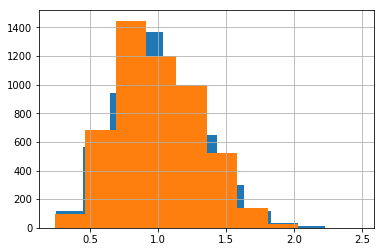

In [6]:
df.b2b_prev_norm.hist()
df.PRIX_BAR_norm.hist()

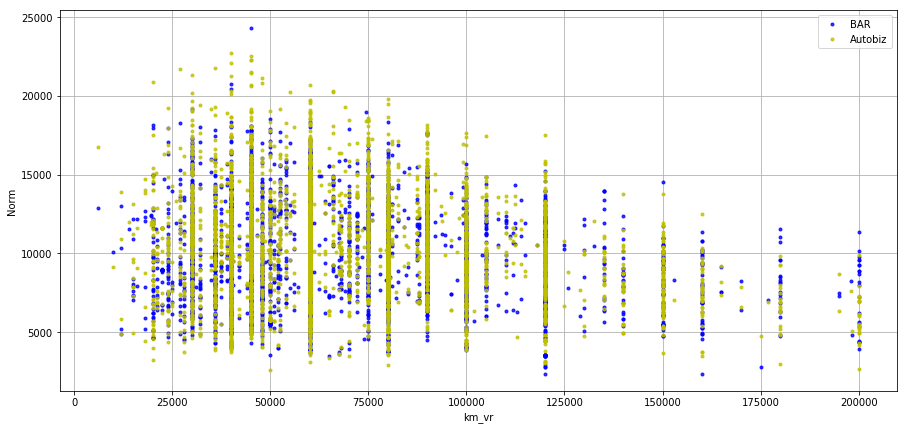

In [7]:
fig = plt.figure(figsize=(15,7))
plt.plot(df.km_vr, df.PRIX_BAR, 'b.', alpha=0.8, label='BAR')
plt.plot(df.km_vr, df.b2b_prev, 'y.', alpha=0.8, label='Autobiz')

plt.legend()
plt.xlabel('km_vr')
plt.ylabel('Norm')
plt.grid(True)

In [8]:
print(np.mean(df.PRIX_BAR/df.b2b_prev))
# En moyenne nous sommes plus cher

0.977013522223


In [9]:
df['Dif'] = df.b2b_prev-df.PRIX_BAR
df['Percent']=df.Dif/df.b2b_prev
df_quant_25 = df[df.b2b_prev<8000]
df_quant_50 = df[(df.b2b_prev>=8000) & (df.b2b_prev<10000)]
df_quant_75 = df[(df.b2b_prev>=10000) & (df.b2b_prev<12250)]
df_quant_100 = df[df.b2b_prev>=12250]
print(len(df_quant_25),len(df_quant_50),len(df_quant_75),len(df_quant_100))

1339 1195 1286 1280


In [10]:
print(np.mean(df_quant_25.PRIX_BAR/df_quant_25.b2b_prev),\
      np.mean(df_quant_50.PRIX_BAR/df_quant_50.b2b_prev),\
      np.mean(df_quant_75.PRIX_BAR/df_quant_75.b2b_prev),\
      np.mean(df_quant_100.PRIX_BAR/df_quant_100.b2b_prev))

1.05806134768 0.974682912582 0.951043301493 0.920497697293


Pour les véhicules dont le prix est inférieur à 8000€ nous sommes moins cher,
pour le reste, nous sommes plus cher. Soit 3761 véhicules sur 5100.

In [11]:
nb_neg = len(df[df['Dif']<0])
nb_pos = len(df[df['Dif']>0])
nb_equal=len(df[df['Dif']==0])
print('Moins cher :',nb_neg, 'Plus cher :',nb_pos, 'Egal :',nb_equal)

Moins cher : 1990 Plus cher : 3107 Egal : 3


Nous sommes plus cher sur 3107 véhicules, moins cher sur 1990 véhicules et identiques pour 3. 

In [12]:
print('%.2f'%(100*nb_neg/5100),'%','%.2f'%(100*nb_pos/5100),'%','%.2f'%(100*nb_equal/5100),'%')

39.02 % 60.92 % 0.06 %


In [13]:
print(df['Dif'].mean(0))

408.791372549


In [14]:
df_moinscher = df[df['Dif']<0]
df_pluscher = df[df['Dif']>0]
print(round(df_pluscher.Dif.mean(0)),'€',round(df_moinscher.Dif.mean(0)),'€')

1378.0 € -1104.0 €


In [15]:
vers = df['Version PSA']
vers = [i.split() for i in vers]
vers = [i[0]+' '+i[1] for i in vers]
df['Versioning']=vers
print(df['Versioning'].head())

0             108 Active
1             308 Active
2               GRAND C4
3      Boxer Kastenwagen
4    BERLINGO MULTISPACE
Name: Versioning, dtype: object


In [16]:
df_percent = df.sort_values(by='Percent')
print(df_percent[['vo_annonce_id','Versioning','PRIX_NEUF_BAR','PRIX_NEUF_AUTOBIZ','PRIX_BAR', 'b2b_prev', 'Dif', 'Percent']].head(60))
print(df_percent[['vo_annonce_id','Versioning','PRIX_BAR', 'b2b_prev', 'Dif', 'Percent']].tail())

      vo_annonce_id           Versioning  PRIX_NEUF_BAR  PRIX_NEUF_AUTOBIZ  \
3601           3755   Expert Kastenwagen        28132.0                NaN   
1832           1910           Expert Pro        30368.0            16425.0   
1338           1387   Expert Kastenwagen        26799.0                NaN   
4945           5156   Expert Kastenwagen        27489.0                NaN   
5460           5686   Expert Kastenwagen        27787.0                NaN   
5552           5779          Boxer Cargo        65708.0            33175.0   
3055           3185  Partner Kastenwagen        23516.0            15057.0   
3054           3184  Partner Kastenwagen        23516.0            15057.0   
3542           3692  Partner Kastenwagen        23516.0            15057.0   
5272           5495   Expert Kastenwagen        28799.0                NaN   
4366           4549   Bipper Kastenwagen        18850.0                0.0   
2168           2261   Expert Kastenwagen        44411.0         

In [17]:
nb_car_bad = len(df[df['Percent']<-0.1]) + len(df[df['Percent']>0.1])
nb_car_near = len(df[(df['Percent']>=-0.1) & (df['Percent']<-0.05)]) + len(df[(df['Percent']<=0.1) & (df['Percent']>0.05)])
print('Bad :','%.2f'%(100*nb_car_bad/len(df)),'%', 'Near :','%.2f'%(100*nb_car_near/len(df)),'%', 'Good :','%.2f'%(100-100*(nb_car_bad+nb_car_near)/len(df)),'%')

Bad : 53.75 % Near : 21.59 % Good : 24.67 %


In [18]:
df_double = df[(df['Percent']<=-0.5)]# & (df['Percent']>=0.5)]
df_double2 =df[df['Percent']>=0.5]
df_double = pd.concat([df_double, df_double2],0)
print(len(df_double))
print(df_double.Versioning.unique())

44
['JU PROLI33' 'Expert Kastenwagen' 'Expert TwinCab' 'Bipper Kastenwagen'
 'BERLINGO KaWa' '308 SW' 'Boxer Kastenwagen' 'JUMPER KaWa' 'Expert Pro'
 'Partner Kastenwagen' 'JUMPY Kastenwagen' 'JUMPER KAWA' 'Boxer Cargo'
 'JUMPER Kastenwagen' 'iOn Active']


In [19]:
print(df_double[['vo_annonce_id','Versioning','PRIX_NEUF_BAR','PRIX_NEUF_AUTOBIZ',\
                  'PRIX_BAR', 'b2b_prev', 'Dif', 'Percent','URL']])

      vo_annonce_id           Versioning  PRIX_NEUF_BAR  PRIX_NEUF_AUTOBIZ  \
78               82           JU PROLI33        39984.0                0.0   
382             392   Expert Kastenwagen        29119.0                NaN   
497             514       Expert TwinCab        34272.0                0.0   
505             523   Bipper Kastenwagen        18196.0                0.0   
742             767        BERLINGO KaWa        23920.0                0.0   
989            1024   Expert Kastenwagen        33498.0                0.0   
1076           1113               308 SW        27091.0                NaN   
1180           1221    Boxer Kastenwagen        41575.0                0.0   
1216           1258   Expert Kastenwagen        33474.0            22206.0   
1338           1387   Expert Kastenwagen        26799.0                NaN   
1369           1419          JUMPER KaWa        43828.0            25207.0   
1778           1848   Expert Kastenwagen        36688.0         

In [53]:
df_double2 = df_double.drop_duplicates(['Desc LCDV'])
#df_double3 = df_double2.copy()
#del df_double3['Versioning' ]
numb = 19
print(len(df_double2))

print(df_double2.iloc[numb])
print(df_double2['URL'].iat[numb])
car = df_double2.iloc[numb]
age = datetime.now() - datetime.strptime(car.MEC, '%d/%m/%Y') 
age = age.days/30
#print(age.days/30)
km = age * car.KMM
print(km)

28
vo_annonce_id                                                      3184
cote_vo                                                               0
cote_mcclbp                                                        8575
VIN                                                   vf37f9hf0fj640523
MCCLBP                                    DE-82-2716-2-22-1-1.60-90---N
PRIX_NEUF_BAR                                                     23516
PRIX_BAR                                                           8659
KMM                                                                5830
PRIX_NEUF_AUTOBIZ                                                 15057
Ref ID                                                           137096
porte                                                                 0
MEC                                                           22/5/2015
date_vr                                             2017-05-21 00:00:00
km_vr                                                        